In [ ]:
import kagglehub
import pandas as pd

file_path = kagglehub.dataset_download("sebastianstei/restaurantbesucher-im-skigebiet")
df = pd.read_csv(file_path + '/restaurant_besucher_skigebiet_36monate.csv')

print("First 5 records:", df.head())

In [ ]:
print(df.info()) # Zeigt Basisinformationen zum DataFrame an.
print(df.describe()) # Zeigt deskriptive Statistiken für numerische Spalten an

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Datum            1095 non-null   object 
 1   Besucherzahl     1095 non-null   int64  
 2   Temperatur (°C)  1095 non-null   float64
 3   Wochentag        1095 non-null   object 
 4   Feiertag         1095 non-null   int64  
 5   Schneehöhe (cm)  1095 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 51.5+ KB
None
       Besucherzahl  Temperatur (°C)     Feiertag  Schneehöhe (cm)
count   1095.000000      1095.000000  1095.000000      1095.000000
mean      58.010959         6.415616     0.007306        14.892420
std       13.766460         7.067988     0.085201        27.165939
min       17.000000       -13.700000     0.000000         0.000000
25%       49.000000         2.250000     0.000000         0.000000
50%       57.000000         8.900000     0.000000       

In [ ]:
import numpy as np
import pandas as pd

# Ordinal Encoding für den Wochentag
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df['Wochentag'] = [days.index(d) for d in df['Wochentag']]
df['day_of_week_sin'] = np.sin(2 * np.pi * df['Wochentag'] / 7)
df['day_of_week_cos'] = np.cos(2 * np.pi * df['Wochentag'] / 7)
df = df.drop('Wochentag', axis=1)

# Das Dateum wird zum Index da keine Zeilen ausgelassen werden.
df['Datum'] = pd.to_datetime(df['Datum'], format='%m/%d/%Y')

# Sicherstellen, dass der Datensatz zeitlich geordnet ist.
df = df.sort_values(by='Datum')
df = df.set_index('Datum')

# Encodieren des Tages als Sinus, bzw. Cosinus um saisonelle Trends besser zu erkennen.
df['day_of_year'] = df.index.dayofyear
days_in_year = np.where(df.index.is_leap_year, 366, 365)
df['day_of_year_sin'] = np.sin(2 * np.pi * (df['day_of_year'] - 1) / days_in_year)
df['day_of_year_cos'] = np.cos(2 * np.pi * (df['day_of_year'] - 1) / days_in_year)
df = df.drop('day_of_year', axis=1)

print(df.head())

            Besucherzahl  Temperatur (°C)  Feiertag  Schneehöhe (cm)  \
Datum                                                                  
2021-01-01            64             -5.2         0             36.0   
2021-01-02            78             -4.8         0             66.9   
2021-01-03            86            -11.0         0             90.4   
2021-01-04            75             -2.3         0             39.6   
2021-01-05            57             -4.0         0             62.8   

            day_of_week_sin  day_of_week_cos  day_of_year_sin  day_of_year_cos  
Datum                                                                           
2021-01-01        -0.433884        -0.900969         0.000000         1.000000  
2021-01-02        -0.974928        -0.222521         0.017213         0.999852  
2021-01-03        -0.781831         0.623490         0.034422         0.999407  
2021-01-04         0.000000         1.000000         0.051620         0.998667  
2021-01-0

In [ ]:
# Auswahl der numerischen Spalten für die Kovarianzberechnung
numerical_cols = df.select_dtypes(include=['number']).columns

# Berechnung der Kovarianzmatrix
covariance_matrix = df[numerical_cols].corr()

# Ausgabe der Kovarianzmatrix
print(covariance_matrix)

                 Besucherzahl  Temperatur (°C)  Feiertag  Schneehöhe (cm)  \
Besucherzahl         1.000000        -0.278090  0.112154         0.296659   
Temperatur (°C)     -0.278090         1.000000 -0.113577        -0.871479   
Feiertag             0.112154        -0.113577  1.000000         0.145712   
Schneehöhe (cm)      0.296659        -0.871479  0.145712         1.000000   
day_of_week_sin     -0.522904         0.011334 -0.086244        -0.011173   
day_of_week_cos      0.078677         0.006755  0.019804         0.003419   
day_of_year_sin      0.040844        -0.154238 -0.006252         0.154771   
day_of_year_cos      0.208712        -0.644127  0.120987         0.683165   

                 day_of_week_sin  day_of_week_cos  day_of_year_sin  \
Besucherzahl           -0.522904         0.078677     4.084429e-02   
Temperatur (°C)         0.011334         0.006755    -1.542379e-01   
Feiertag               -0.086244         0.019804    -6.252171e-03   
Schneehöhe (cm)        -0.

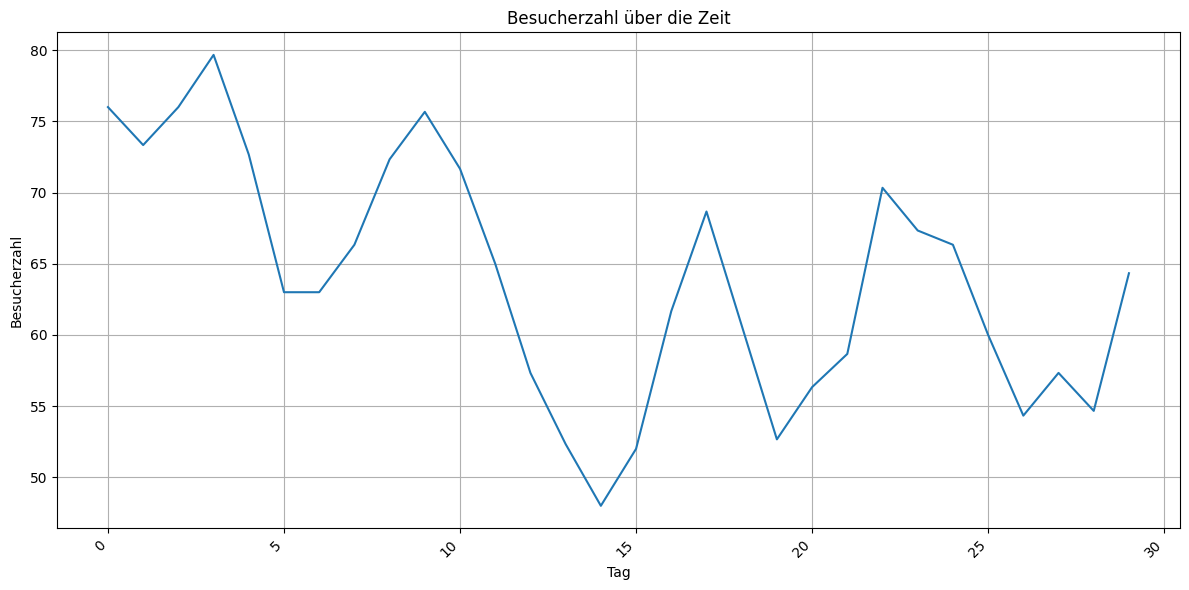

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

import numpy as np

def smooth(y, window_size=3):
  if window_size <= 0:
    raise ValueError("Window size must be a positive integer.")

  padded_y = np.pad(y, (window_size - 1, 0), mode='reflect')

  return [np.mean(padded_y[i : i + window_size]) for i in range(len(y))]

plt.figure(figsize=(12, 6))  # Größe des Diagramms anpassen
plt.plot(range(30), smooth(df['Besucherzahl'][:30]))
plt.xlabel('Tag')
plt.ylabel('Besucherzahl')
plt.title('Besucherzahl über die Zeit')
plt.xticks(rotation=45, ha='right')  # X-Achsenbeschriftungen drehen
plt.tight_layout()  # Vermeidet Überschneidungen
plt.grid(True)  # Gitternetzlinien hinzufügen
plt.show()

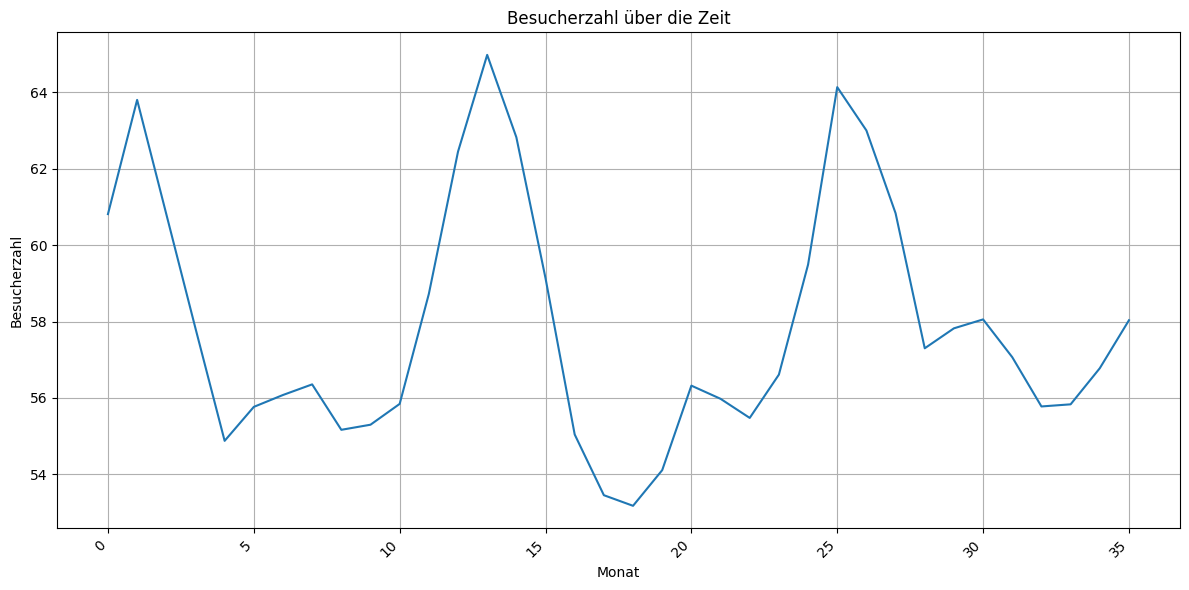

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

plt.figure(figsize=(12, 6))  # Größe des Diagramms anpassen
plt.plot(range(36), smooth([df['Besucherzahl'][i*30: (i+1)*30].mean() for i in range(36)]))
plt.xlabel('Monat')
plt.ylabel('Besucherzahl')
plt.title('Besucherzahl über die Zeit')
plt.xticks(rotation=45, ha='right')  # X-Achsenbeschriftungen drehen
plt.tight_layout()  # Vermeidet Überschneidungen
plt.grid(True)  # Gitternetzlinien hinzufügen
plt.show()

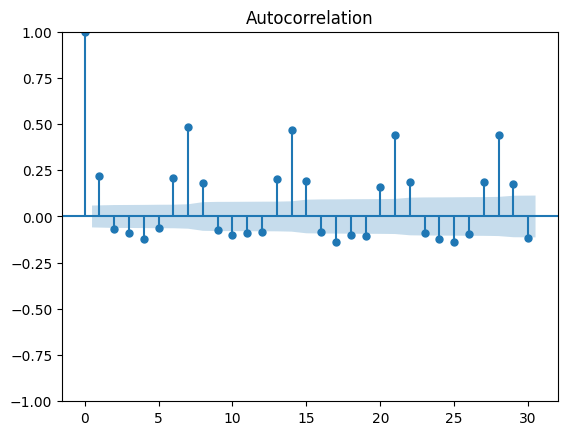

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['Besucherzahl'], lags=30)
plt.show()

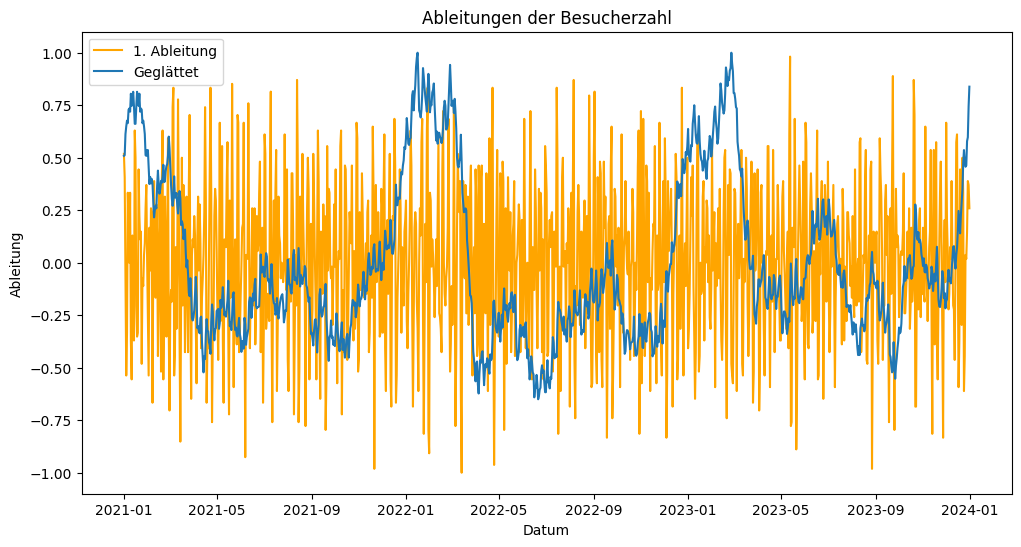

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter

# Berechne die ersten drei Ableitungen
besucherzahl_1st_deriv = np.gradient(df['Besucherzahl'])
besucherzahl_smoothed = smooth(df['Besucherzahl'], 30)

# Zentrieren
besucherzahl_smoothed = (besucherzahl_smoothed-np.mean(besucherzahl_smoothed))
# Auf max. Höhe 1 begrenzen.
besucherzahl_smoothed /= np.max(np.abs(besucherzahl_smoothed))

# Plotten der geglätteten Besucherzahl
plt.figure(figsize=(12, 6))
plt.plot(df.index, besucherzahl_1st_deriv/np.max(np.abs(besucherzahl_1st_deriv)), label='1. Ableitung', color='orange')
plt.plot(df.index, besucherzahl_smoothed, label='Geglättet')
plt.xlabel('Datum')
plt.ylabel('Ableitung')
plt.title('Ableitungen der Besucherzahl')
plt.legend()
plt.show()


In [ ]:
import numpy as np

y = df['Besucherzahl'].to_numpy()
print(df.head())
X = df.to_numpy() # Mit Besucherzahl, Vorhersage des nächsten Wertes.

            Besucherzahl  Temperatur (°C)  Feiertag  Schneehöhe (cm)  \
Datum                                                                  
2021-01-01            64             -5.2         0             36.0   
2021-01-02            78             -4.8         0             66.9   
2021-01-03            86            -11.0         0             90.4   
2021-01-04            75             -2.3         0             39.6   
2021-01-05            57             -4.0         0             62.8   

            day_of_week_sin  day_of_week_cos  day_of_year_sin  day_of_year_cos  
Datum                                                                           
2021-01-01        -0.433884        -0.900969         0.000000         1.000000  
2021-01-02        -0.974928        -0.222521         0.017213         0.999852  
2021-01-03        -0.781831         0.623490         0.034422         0.999407  
2021-01-04         0.000000         1.000000         0.051620         0.998667  
2021-01-0

In [ ]:
import numpy as np

# Aufteilen des Trainingsdatensatzes.
X_train, X_test = np.array(X[:2*360]), np.array(X[2*360:])
y_train, y_test = np.array(y[:2*360]), np.array(y[2*360:])

In [ ]:
from sklearn.metrics import mean_squared_error

def show_model_performance(model_fit, forcast = 360, smooth_factor=30):
  """
  Visualisieren der Vorhersagen.

  Args:
    model_fit (np.ndarray): Ein ein-dimensionales Array, das die Vorhersagen enthält.
    forcast (int): Die Länge der Vorhersage.
    smooth_factor (int): Die Stärke der Glättung.
  """
  predictions = model_fit.forecast(forcast)

  se = []
  daily_predictions = []
  for i in range(1,forcast+1):
    pred = model_fit.forecast()
    daily_predictions.append(pred[0])
    se.append((y_test[i-1] - pred[0])**2)
    model_fit = model_fit.append([y_test[i-1]], refit=False)

  print("MSE (Täglich): ", np.mean(se))
  print("MSE ("+str(forcast)+"): ", mean_squared_error(y_test[:len(predictions)], predictions))

  # Vorhersage für die nächsten 30 Tage
  daily_predictions = daily_predictions[:forcast]

  y_test_smooth = y_test
  if smooth_factor > 0:
    daily_predictions = smooth(daily_predictions, smooth_factor)
    predictions = smooth(predictions, smooth_factor)
    y_test_smooth = smooth(y_test, smooth_factor)

  plt.figure(figsize=(12, 6))
  plt.plot(range(len(predictions)), predictions, color='red', label=str(forcast)+' Tage Vorhersage')
  plt.plot(range(len(daily_predictions)), daily_predictions, color='orange', label='Tägliche Vorhersage')
  plt.plot(range(len(predictions)), y_test_smooth[:len(predictions)], color='green', label='Tatsächliche Besucherzahl')
  plt.xlabel('Zeitpunkt')
  plt.ylabel('Besucherzahl')
  plt.title('Vorhersage der Besucherzahl')
  plt.legend()
  plt.grid(True)
  plt.show()

MSE (Täglich):  142.0913691865807
MSE (360):  206.78728778738207


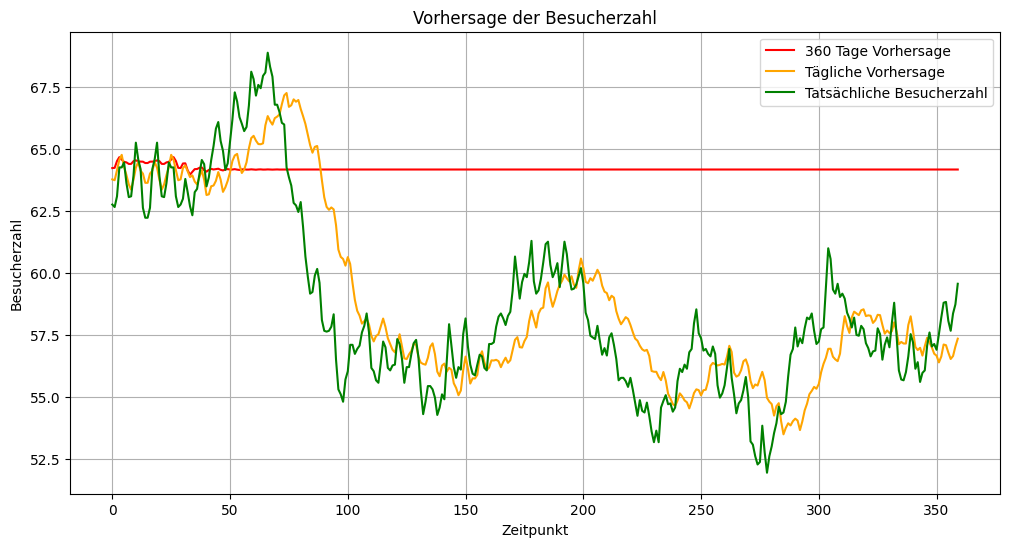

MSE (Täglich):  151.12086936152684
MSE (30):  180.38479567904338


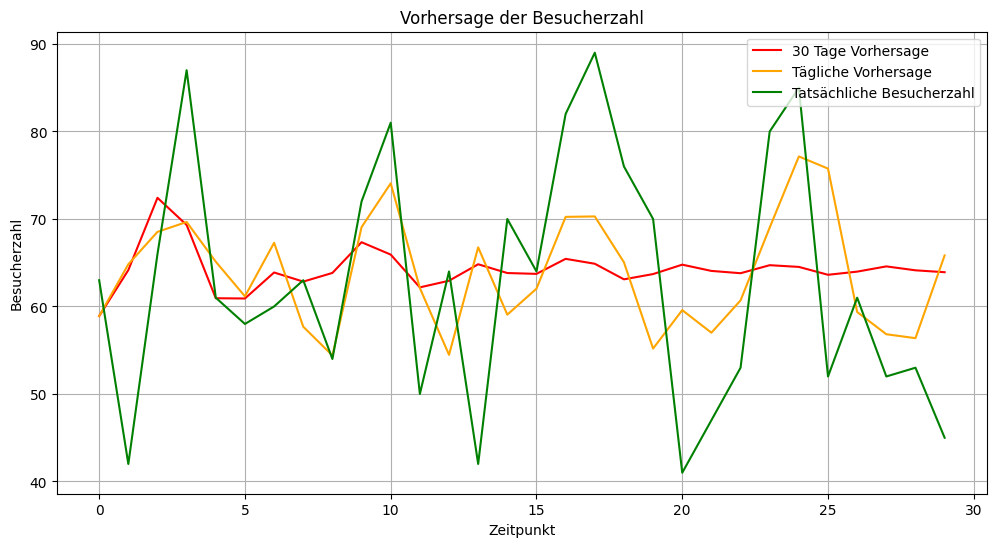

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Erzuegen eines ARIMA Modells zur Vorhersage von Besucherzahlen.
model = ARIMA(y_train, order=(5, 1, 3))
model_fit = model.fit()

show_model_performance(model_fit)

show_model_performance(model_fit, 30, 0)

MSE (Täglich):  101.64355659654714
MSE (360):  122.9072496966384


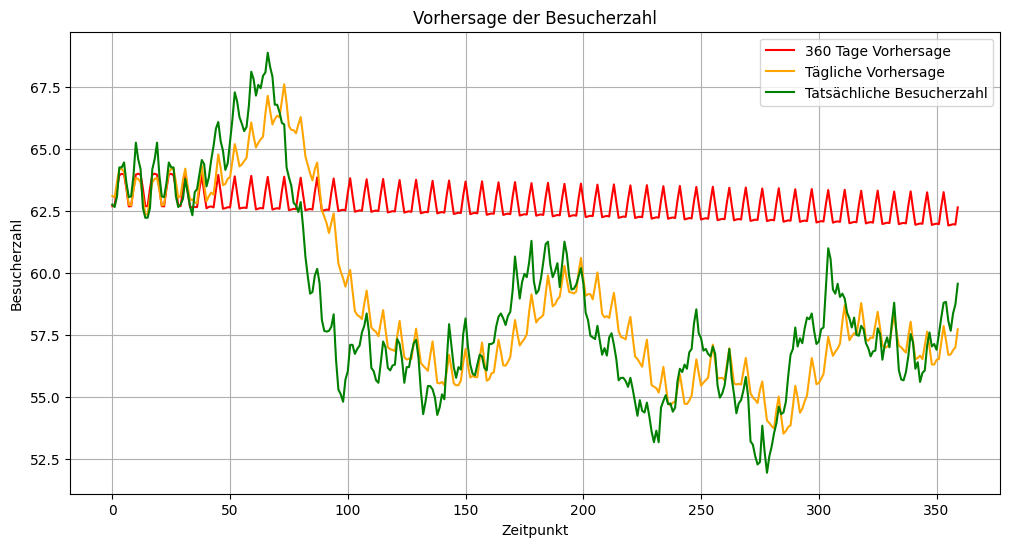

MSE (Täglich):  108.27766042455492
MSE (30):  96.03181303512935


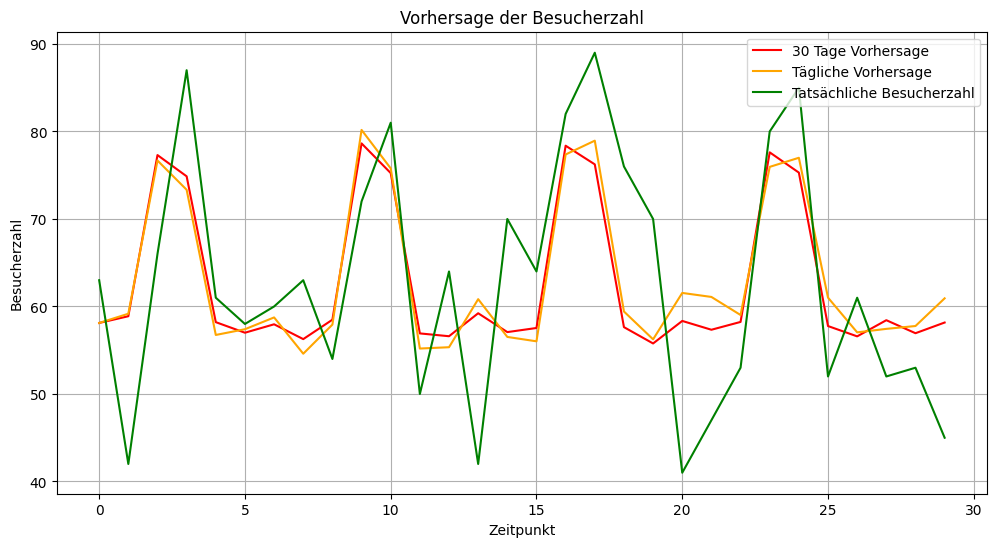

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

order = (5, 1, 3)
seasonal_order = (3, 0, 2, 7)

model = SARIMAX(y_train, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(maxiter=1000, disp=True)

show_model_performance(model_fit)

show_model_performance(model_fit, 30, 0)

In [ ]:
print(X.shape)

(1095, 8)


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Standardisieren von X und y
scaler_X_temp = StandardScaler()
scaler_X_snow = StandardScaler()
scaler_y = StandardScaler()

X_train_norm = np.array(X_train)
y_train_norm = np.array(y_train)
X_test_norm = np.array(X_test)
y_test_norm = np.array(y_test)

# Normalisieren
y_train_norm = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_norm = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Standardisieren der y werte in x mit gleichen Scaler.
X_train_norm[:, 0] = scaler_y.transform(X_train[:, 0].reshape(-1, 1)).flatten();
X_test_norm[:, 0] = scaler_y.transform(X_test[:, 0].reshape(-1, 1)).flatten();


X_train_norm[:, 1] = scaler_X_temp.fit_transform(X_train[:, 1].reshape(-1, 1)).flatten();
X_test_norm[:, 1] = scaler_X_temp.transform(X_test[:, 1].reshape(-1, 1)).flatten();

X_train_norm[:, 3] = scaler_X_snow.fit_transform(X_train[:, 3].reshape(-1, 1)).flatten();
X_test_norm[:, 3] = scaler_X_snow.transform(X_test[:, 3].reshape(-1, 1)).flatten();

In [ ]:
def create_sequences(X, y, window_size=7):
  _X, _y = [], []
  for i in range(len(X) - window_size):
    _X.append(X[i:i+window_size])
    _y.append(y[i + window_size])
  return np.array(_X), np.array(_y)

LENGTH = 30

X_train_norm, y_train_norm = create_sequences(X_train_norm, y_train_norm, LENGTH)
X_test_norm, y_test_norm = create_sequences(X_test_norm, y_test_norm, LENGTH)

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 1.4007 - val_loss: 1.0607
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.1289 - val_loss: 0.9686
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.0624 - val_loss: 0.8995
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.9316 - val_loss: 0.8574
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.8579 - val_loss: 0.8144
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.8398 - val_loss: 0.7716
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.8130 - val_loss: 0.7291
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.7927 - val_loss: 0.6992
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.7811 - val_loss: 0.7105
Epoch 10/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7269 - val_loss: 0.6596
Epoch 11/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7449 - val_loss: 0.6784
Epoch 12/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step

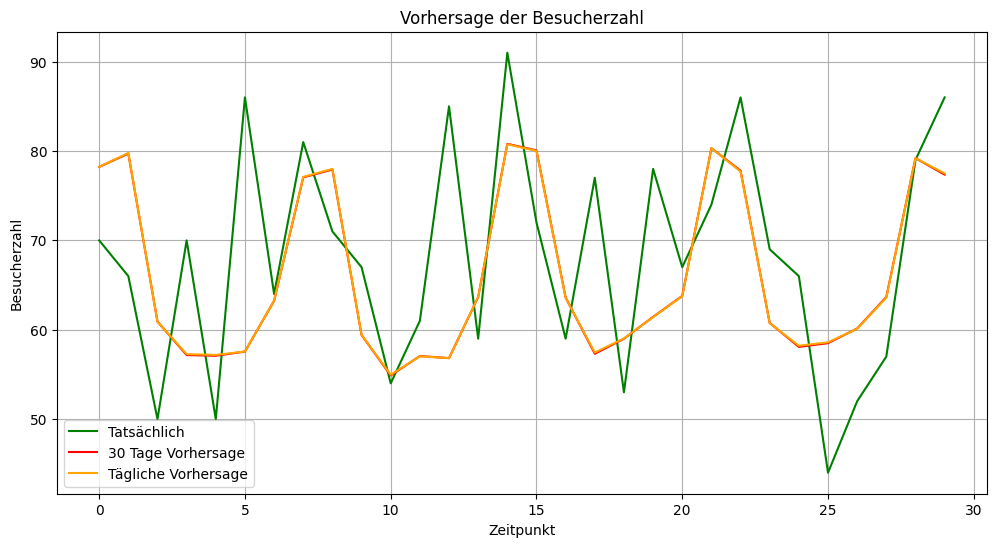

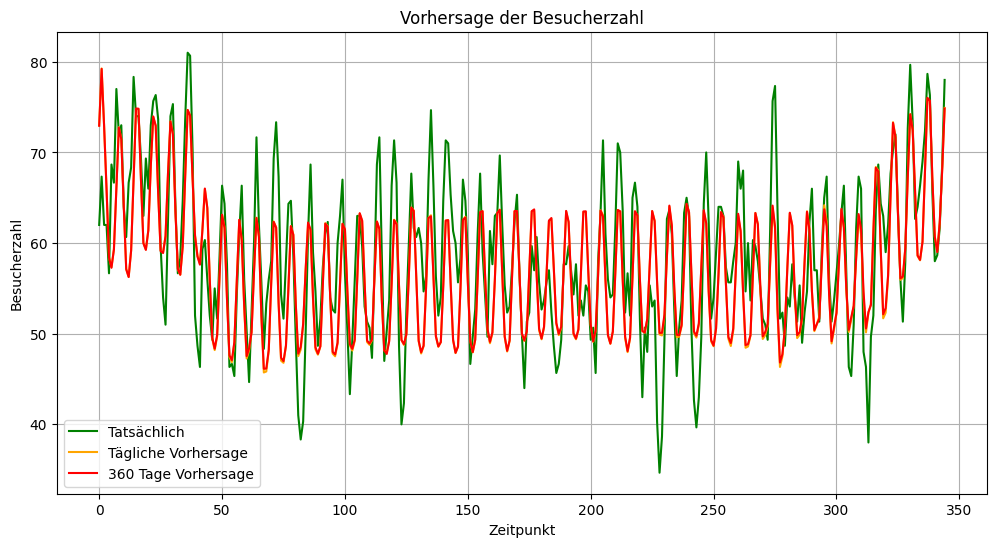

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import mean_squared_error

model = keras.Sequential([
    layers.Input((LENGTH, X_train_norm.shape[2])),
    layers.LSTM(16, activation="leaky_relu", kernel_regularizer=regularizers.l2(0.01), recurrent_regularizer=regularizers.l2(0.01)),
    layers.Dense(1)
])

model.compile(optimizer=keras.optimizers.Adam(), loss="mse")
model.fit(X_train_norm, y_train_norm, epochs=100, batch_size=16,
              validation_data=(X_test_norm, y_test_norm))

# Hier können Sie die Vorhersagen des Modells erhalten und visualisieren:
predictions_daily = model.predict(X_test_norm)[:,0]
predictions_daily = scaler_y.inverse_transform([predictions_daily])[0]

# Wollen wir eine Vorhersage über einen längernen Zeitraum mit Wettervorhersagen
# simulieren, können wir die Vorhersage nutzen, um noch weiter in die Zukunft
# zu blicken.
forcast = 360
predictions = []
window = list(X_test_norm[0])
for i in range(0, min(X_test_norm.shape[0],forcast)):
  pred = list(model.predict(np.array(window).reshape((-1, LENGTH, len(window[0]))), verbose=0))[-1][0]
  if(i+1 < len(X_test_norm)):
    window = list(X_test_norm[i+1])
    window[-1][0] = pred
  predictions.append(pred)

predictions = scaler_y.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

print("MSE (Täglich)", mean_squared_error(y_test[LENGTH:], predictions_daily))
print("MSE (30)", mean_squared_error(y_test[LENGTH:30+LENGTH], predictions[:30]))
print("MSE (360)", mean_squared_error(y_test[LENGTH:forcast+LENGTH], predictions))

plt.figure(figsize=(12, 6))
plt.plot(y_test[LENGTH:LENGTH+30], color='green', label='Tatsächlich')
plt.plot(predictions[:30], color='red', label='30 Tage Vorhersage')
plt.plot(predictions_daily[:30], color='orange', label='Tägliche Vorhersage')
plt.legend()
plt.xlabel('Zeitpunkt')
plt.ylabel('Besucherzahl')
plt.title('Vorhersage der Besucherzahl')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(smooth(list(y_test[LENGTH:])), color='green', label='Tatsächlich')
plt.plot(smooth(np.array(predictions_daily)), color='orange', label='Tägliche Vorhersage')
plt.plot(smooth(predictions), color='red', label=str(forcast) +' Tage Vorhersage')
plt.legend()
plt.xlabel('Zeitpunkt')
plt.ylabel('Besucherzahl')
plt.title('Vorhersage der Besucherzahl')
plt.legend()
plt.grid(True)
plt.show()